In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Given Signals -----
signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])  # Reference (fast speech)
signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])  # Test (slow speech)

print("Length of Signal 1:", len(signal1))
print("Length of Signal 2:", len(signal2))


Length of Signal 1: 9
Length of Signal 2: 12


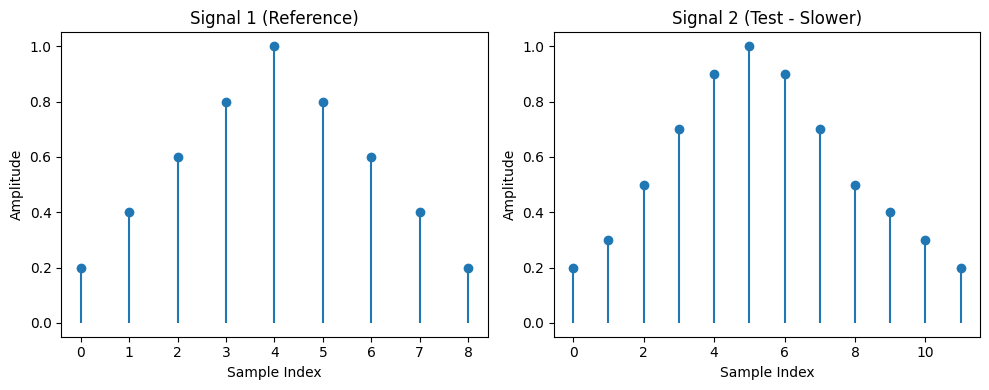

In [ ]:
# ----- Task 1: Plot original signals -----
plt.figure(figsize=(10, 4))

# Plot Signal 1
plt.subplot(1, 2, 1)
plt.stem(range(len(signal1)), signal1, basefmt=" ")
plt.title("Signal 1 (Reference)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

# Plot Signal 2
plt.subplot(1, 2, 2)
plt.stem(range(len(signal2)), signal2, basefmt=" ")
plt.title("Signal 2 (Test - Slower)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [ ]:
# ----- Task 2: Linear Time Normalization (Resampling Signal 2 to length of Signal 1) -----

N1 = len(signal1)  # length of reference signal
N2 = len(signal2)  # length of test signal

# Original time indices for Signal 2
t2_original = np.linspace(0, 1, N2)

# New time indices we want (same number of points as Signal 1)
t2_normalized = np.linspace(0, 1, N1)

# Perform linear interpolation
signal2_ltn = np.interp(t2_normalized, t2_original, signal2)

print("Original Signal 2 length:", N2)
print("LTN-normalized Signal 2 length:", len(signal2_ltn))
print("LTN-normalized Signal 2:", signal2_ltn)


Original Signal 2 length: 12
LTN-normalized Signal 2 length: 9
LTN-normalized Signal 2: [0.2    0.375  0.65   0.9125 0.95   0.725  0.475  0.3375 0.2   ]


In [ ]:
# ----- Task 3: Compute alignment mapping -----

# Index positions of Signal 1 (0-based)
i_indices = np.arange(N1)

# Corresponding (fractional) positions in original Signal 2
# Mapping from normalized time to original Signal 2 index space
j_indices_float = (t2_normalized * (N2 - 1))  # because original indices go from 0 to N2-1

# For clarity, you can also take nearest integer indices:
j_indices_nearest = np.round(j_indices_float).astype(int)

# Print alignment mapping
print("Index in Signal 1  ->  (Approx.) Index in Signal 2")
for i, j in zip(i_indices, j_indices_nearest):
    print(f"{i:>5}                ->{j:>5}")


Index in Signal 1  ->  (Approx.) Index in Signal 2
    0                ->    0
    1                ->    1
    2                ->    3
    3                ->    4
    4                ->    6
    5                ->    7
    6                ->    8
    7                ->   10
    8                ->   11


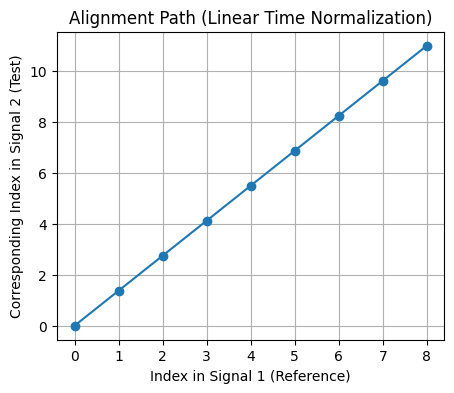

In [ ]:
# ----- Task 4: Plot alignment path -----

plt.figure(figsize=(5, 4))
plt.plot(i_indices, j_indices_float, marker='o')
plt.title("Alignment Path (Linear Time Normalization)")
plt.xlabel("Index in Signal 1 (Reference)")
plt.ylabel("Corresponding Index in Signal 2 (Test)")
plt.grid(True)
plt.show()


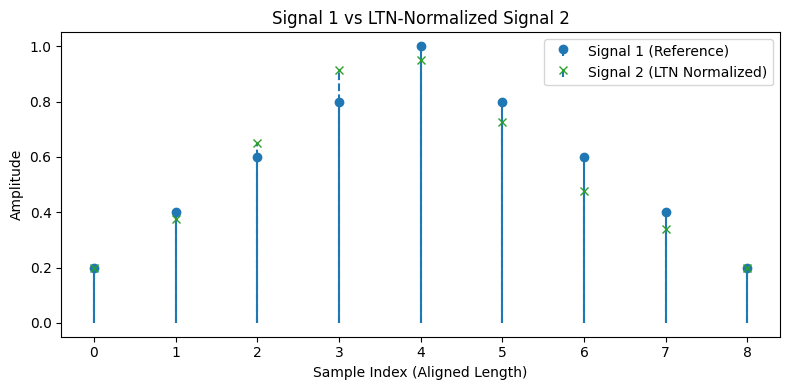

In [ ]:
# Overlay plot to compare Signal 1 and LTN-normalized Signal 2

plt.figure(figsize=(8, 4))
plt.stem(range(N1), signal1, linefmt='-', markerfmt='o', basefmt=" ", label="Signal 1 (Reference)")
plt.stem(range(N1), signal2_ltn, linefmt='--', markerfmt='x', basefmt=" ", label="Signal 2 (LTN Normalized)")
plt.title("Signal 1 vs LTN-Normalized Signal 2")
plt.xlabel("Sample Index (Aligned Length)")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


Inference:
Linear Time Normalization (LTN) was applied to adjust the time axis of the slower speech signal (Signal 2) so that it matches the length of the faster reference signal (Signal 1). By resampling Signal 2 using linear interpolation, both signals were brought to the same number of samples, which makes their temporal patterns directly comparable. The alignment path plot shows an almost perfectly linear relationship between the sample indices of Signal 1 and Signal 2, indicating that LTN performs a uniform stretching/compression of time. After normalization, the main peaks and valleys of the two waveforms occur at similar sample positions, demonstrating that LTN effectively aligns corresponding regions of the speech signals despite differences in speaking speed.